# **Regression Analysis**

This notebook shows the regression analysis through several ML metrics to find the performance of linear and logistic regression, and how different models fit perfecty on certains datasets with higher accuracy than others.

---

# **Installing and importing necessary libraries**

---

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

# **Accessing the data**

---

In [ ]:
#data1 = 'https://raw.githubusercontent.com/github-goog/colab/main/LinearRegression-Data.csv'
#data2 = 'https://raw.githubusercontent.com/github-goog/colab/main/LogisticRegression-Data.csv'

#Defining data source paths
data1 = '/path/LinearRegression-Data.csv'
data2 = '/path/LogisticRegression-Data.csv'

#Conversting raw CSV file to pandas dataframe
dataset1 = pd.read_csv(data1)
dataset2 = pd.read_csv(data2)

In [ ]:
#Dropping dataset rows with NULL values
dataset1.dropna(inplace=True)
dataset2.dropna(inplace=True)

#Changing string to numerical data in dataset2
result=pd.get_dummies(dataset2["Result"])
result=pd.get_dummies(dataset2["Result"],drop_first=True)
dataset2=pd.concat([dataset2, result], axis=1)
dataset2=dataset2.drop("Result",axis=1)

#Sorting and re-indexing dataset2
dataset2 = dataset2.sort_values(by=['Hours'])
dataset2 = dataset2.reset_index(drop=True)

In [ ]:
#Showing the top of 1st dataset
dataset1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
#Showing the top of 2nd dataset
dataset2.head()

,Hours,StudentId,Pass
0,0.5,1,0
1,1.0,10,0
2,1.2,15,0
3,1.5,21,0
4,1.7,16,0


In [ ]:
#Showing the details of 1st dataset
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [ ]:
#Showing the details of 2nd dataset
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hours      18 non-null     float64
 1   StudentId  18 non-null     int64  
 2   Pass       18 non-null     uint8  
dtypes: float64(1), int64(1), uint8(1)
memory usage: 434.0 bytes


Text(0, 0.5, 'Salary')

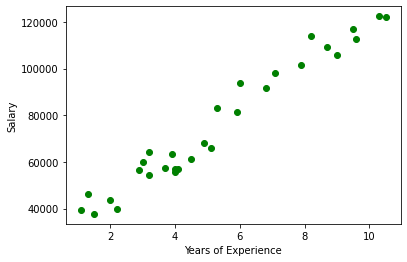

In [ ]:
#Plotting dataset 1 (linear data)
plt.scatter(dataset1.YearsExperience,dataset1.Salary,color='Green')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

Text(0, 0.5, 'Result')

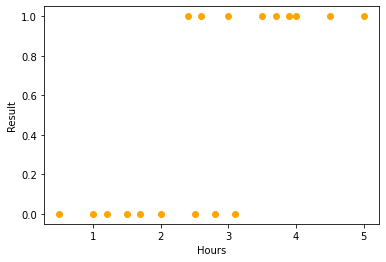

In [ ]:
#Plotting dataset 2 (logistic data)
plt.scatter(dataset2.Hours,dataset2.Pass,color='Orange')
plt.xlabel("Hours")
plt.ylabel("Result")

# **Engineering the data**

---

In [ ]:
#Assigning x and y values for dataset 1
x1 = dataset1[["YearsExperience"]]
y1 = dataset1[["Salary"]]

#Assigning x and y values for dataset 2
x2 = dataset2[["Hours"]]
y2 = dataset2[["Pass"]]

In [ ]:
#Splitting dataset 1 into tarin and test sub-datasets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=2)

#Splitting dataset 2 into tarin and test sub-datasets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=2)

# **Creating models**

---

In [ ]:
#Preparing the linear regression models
Lin_reg_1 = LinearRegression()
Lin_reg_2 = LinearRegression()

#Preparing the logistic regression models
LogR_reg_1 = LogisticRegression()
LogR_reg_2 = LogisticRegression()

In [ ]:
#Training the linear regression model on linear data
Lin_reg_1.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Training the linear regression model on logistic data
Lin_reg_2.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Training the logistic regression model on linear data
LogR_reg_1.fit(x1_train, y1_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Training the logistic regression model on logistic data
LogR_reg_2.fit(x2_train, y2_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Making predictions**

---

In [ ]:
#Predicting linear data on linear regression model
predictions_1 = Lin_reg_1.predict(x1_test)

#Predicting logistic data on linear regression model
predictions_2 = Lin_reg_2.predict(x2_test)

#Predicting linear data on logistic regression model
predictions_3 = LogR_reg_1.predict(x1_test)

#Predicting logistic data on logistic regression model
predictions_4 = LogR_reg_2.predict(x2_test)

**Visualizing predictions of linear regression model on linear data**

Blue   : Original Value <br>
Orange : Predicted Value

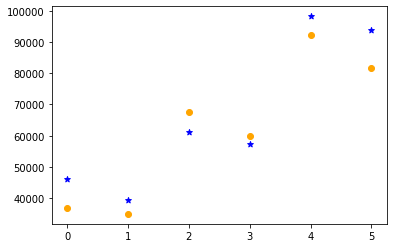

In [ ]:
#Plotting two (super-imposing) scatter plots that show real and predicted values
temp1 = []

for i in range(len(predictions_1)):
  temp1.append(i)

plt.scatter(temp1, y1_test, marker="*", color = 'blue')
plt.scatter(temp1, predictions_1, color = 'orange')

**Visualizing predictions of linear regression model on logistic data**

Blue   : Original Value <br>
Orange : Predicted Value

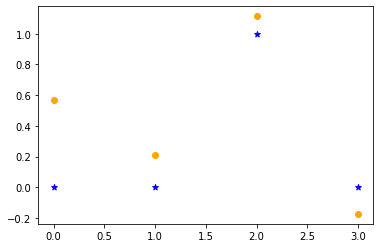

In [ ]:
#Plotting two (super-imposing) scatter plots that show real and predicted values
temp2 = []

for i in range(len(predictions_2)):
  temp2.append(i)

plt.scatter(temp2, y2_test, marker="*", color = 'blue')
plt.scatter(temp2, predictions_2, color = 'orange')

**Visualizing predictions of logistic regression model on linear data**

Blue   : Original Value <br>
Orange : Predicted Value

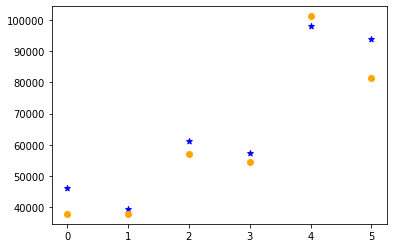

In [ ]:
#Plotting two (super-imposing) scatter plots that show real and predicted values
temp3 = []

for i in range(len(predictions_3)):
  temp3.append(i)

plt.scatter(temp3, y1_test, marker="*", color = 'blue')
plt.scatter(temp3, predictions_3, color = 'orange')

**Visualizing predictions of logistic regression model on logistic data**

Blue   : Original Value <br>
Orange : Predicted Value

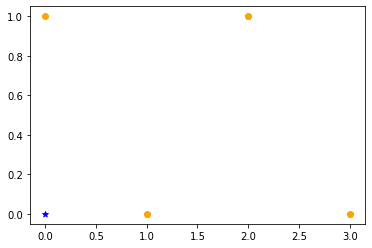

In [ ]:
#Plotting two (super-imposing) scatter plots that show real and predicted values
temp4 = []

for i in range(len(predictions_4)):
  temp4.append(i)

plt.scatter(temp4, y2_test, marker="*", color = 'blue')
plt.scatter(temp4, predictions_4, color = 'orange')

# **Regression Analysis**

In [ ]:
#Finding R2 score value for linear model on linear data
r1 = mean_absolute_error(y1_test, predictions_1)
print("R2 Score : %.5f" %r1)

R2 Score : 6802.77957


In [ ]:
#Finding R2 score value for logistic model on linear data
r3 = mean_absolute_error(y1_test, predictions_3)
print("R2 Score : %.5f" %r3)

R2 Score : 5411.00000


In [ ]:
#Finding R2 score value for linear model on logistic data
r2 = mean_absolute_error(y2_test, predictions_2)
print("R2 Score : %.5f" %r2)

R2 Score : 0.26699


In [ ]:
#Finding R2 score value for logistic model on logistic data
r4 = mean_absolute_error(y2_test, predictions_4)
print("R2 Score : %.5f" %r4)

R2 Score : 0.25000


# **Thank you.**

---